###                     ANALYSIS : PATTERNS IN FLIGHT DELAYS & CANCELLATIONS IN THE UNITED STATES

### Introduction

The primary goal of the project is to analyze and recognize the factors that lead to delays and cancellations of flights in the United States. The factors that have been analysed are Seasons, months, day of the week, holidays, origin airports, reasons for cancellations/delays, regions and Airlines.

Travel websites (Skyscanner, kayak etc.) traditionally provide only the price information to their customers. Our analysis coupled with their price information can help customers make a much more informed decision while planning their travel.

This analysis can also be useful to the different Airlines & Airport Authorities to recognize the patterns and factors that lead to delays and cancellations of flights. Thereby, they can come up with solutions and thus provide better Airline performance and customer satisfaction.

### Data Sources

• Airline On Time Performance data: The data for all carriers provided by U.S. Department of Transportation's (DOT) Bureau of Transportation is available for download in csv format at the website. It contains information like Airline Carrier, Origin Airport, Destination Airport, Day, month, Actual departure time, Departure Delay, Arrival Time, Arrival Delay, Distance between airports, flight time and various other factors. Also, info on some of the variables in this dataset will be merged with their look up tables (such as Carrier, Arrival/Destination airport etc.) 

LINK : https://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236


• US holiday data: Information on US holidays scraped from online sources. The data contains date and holiday corresponding to it.

LINK : https://www.calendar-365.com/holidays.html


• Season Information data: Information regarding start and end of a season scraped from online sources. Data contains season, season start date, season end date etc.

LINK : https://www.calendardate.com/year2018.php


### Data Scraping, Merging and Manipulation

In [1]:
import numpy as np
import pandas as pd
import os
from datetime import *

We have downloaded the data (as a csv file) for each month in 2018 from the DOT website. We created a list of those 12 csv file paths so that it becomes easy to combine them later.

In [3]:
root = './data/month_data/'
allFiles = []
for path,subdir,files in os.walk(root):
    for name in files:
        allFiles.append(os.path.join(path, name))

In [4]:
allFiles

['./data/month_data/308097970_T_ONTIME_REPORTING_1\\308097970_T_ONTIME_REPORTING.csv',
 './data/month_data/308097970_T_ONTIME_REPORTING_2\\308097970_T_ONTIME_REPORTING.csv',
 './data/month_data/308099073_T_ONTIME_REPORTING_3\\308099073_T_ONTIME_REPORTING.csv',
 './data/month_data/308099073_T_ONTIME_REPORTING_4\\308099073_T_ONTIME_REPORTING.csv',
 './data/month_data/308099073_T_ONTIME_REPORTING_5\\308099073_T_ONTIME_REPORTING.csv',
 './data/month_data/308099073_T_ONTIME_REPORTING_6\\308099073_T_ONTIME_REPORTING.csv',
 './data/month_data/308100292_T_ONTIME_REPORTING_10\\308100292_T_ONTIME_REPORTING.csv',
 './data/month_data/308100292_T_ONTIME_REPORTING_11\\308100292_T_ONTIME_REPORTING.csv',
 './data/month_data/308100292_T_ONTIME_REPORTING_12\\308100292_T_ONTIME_REPORTING.csv',
 './data/month_data/308100292_T_ONTIME_REPORTING_7\\308100292_T_ONTIME_REPORTING.csv',
 './data/month_data/308100292_T_ONTIME_REPORTING_8\\308100292_T_ONTIME_REPORTING.csv',
 './data/month_data/308100292_T_ONTIME_R

Creating Variables to store the required columns and their data types.

In [5]:
Cols = ['YEAR','MONTH','DAY_OF_MONTH','DAY_OF_WEEK','OP_CARRIER_AIRLINE_ID','OP_CARRIER','ORIGIN_AIRPORT_ID','ORIGIN','ORIGIN_CITY_NAME','ORIGIN_STATE_NM','DEST_AIRPORT_ID','DEST','DEST_CITY_NAME','DEST_STATE_NM','DEP_TIME','DEP_DELAY','DEP_TIME_BLK','ARR_TIME','ARR_DELAY','ARR_TIME_BLK','CANCELLED','CANCELLATION_CODE','DIVERTED','FLIGHTS','AIR_TIME','DISTANCE','CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY' ]
dtypes = {
'YEAR' : 'int16',
'MONTH' : 'int8',
'DAY_OF_MONTH' : 'int8',
'DAY_OF_WEEK' : 'int8',
'OP_CARRIER_AIRLINE_ID' : 'int16',
'OP_CARRIER' : 'str',
'ORIGIN_AIRPORT_ID' : 'int16',
'ORIGIN' : 'str', 
'ORIGIN_CITY_NAME' : 'str',
'ORIGIN_STATE_NM' : 'str',
'DEST_AIRPORT_ID' : 'int16',
'DEST' : 'str',
'DEST_CITY_NAME' : 'str',
'DEST_STATE_NM' : 'str',
'DEP_TIME' : 'float32',
'DEP_DELAY' : 'float32',
'DEP_TIME_BLK' : 'str',
'ARR_TIME' : 'float32',
'ARR_DELAY' : 'float32',
'ARR_TIME_BLK' : 'str',
'CANCELLED' : 'float32',
'CANCELLATION_CODE': 'str',
'DIVERTED' : 'float32',
'FLIGHTS' : 'int64',
'AIR_TIME' : 'float32',
'DISTANCE' : 'float32',
'CARRIER_DELAY' : 'float32',
'WEATHER_DELAY' : 'float32',
'NAS_DELAY' : 'float32',
'SECURITY_DELAY' : 'float32',
'LATE_AIRCRAFT_DELAY' : 'float32'
}

### Concatinating the 12 months data to a single data frame

In [6]:
df1 = pd.concat([pd.read_csv(file, dtype=dtypes, usecols=Cols) for file in allFiles])
df1.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
0,2018,1,27,6,19977,UA,11697,FLL,"Fort Lauderdale, FL",Florida,...,NaN,0.0,148.0,1,966.0,NaN,NaN,NaN,NaN,NaN
1,2018,1,27,6,19977,UA,14747,SEA,"Seattle, WA",Washington,...,NaN,0.0,98.0,1,679.0,NaN,NaN,NaN,NaN,NaN
2,2018,1,27,6,19977,UA,11278,DCA,"Washington, DC",Virginia,...,NaN,0.0,190.0,1,1208.0,NaN,NaN,NaN,NaN,NaN
3,2018,1,27,6,19977,UA,12892,LAX,"Los Angeles, CA",California,...,NaN,0.0,212.0,1,1744.0,NaN,NaN,NaN,NaN,NaN
4,2018,1,27,6,19977,UA,12451,JAX,"Jacksonville, FL",Florida,...,NaN,0.0,112.0,1,820.0,NaN,NaN,NaN,NaN,NaN


### Merging airlineDT lookup table with our dataframe using merge


In [7]:
airLineDT = pd.read_csv('./data/lookup_tables/L_AIRLINE_ID.csv',names = ['OP_CARRIER_AIRLINE_ID','Description'],dtype={'OP_CARRIER_AIRLINE_ID':'int16','Description':'str'},header=0)
airLineDT.head()

,OP_CARRIER_AIRLINE_ID,Description
0,19031,Mackey International Inc.: MAC
1,19032,Munz Northern Airlines Inc.: XY
2,19033,Cochise Airlines Inc.: COC
3,19034,Golden Gate Airlines Inc.: GSA
4,19035,Aeromech Inc.: RZZ


In [8]:
airLineDT['Airlines'] = airLineDT['Description'].str.split(':').str[0]
airLineDT.drop(labels=['Description'],axis=1,inplace=True)
airLineDT.head()

,OP_CARRIER_AIRLINE_ID,Airlines
0,19031,Mackey International Inc.
1,19032,Munz Northern Airlines Inc.
2,19033,Cochise Airlines Inc.
3,19034,Golden Gate Airlines Inc.
4,19035,Aeromech Inc.


In [9]:
df1 = df1.merge(airLineDT, on='OP_CARRIER_AIRLINE_ID', how='left')
df1.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Airlines
0,2018,1,27,6,19977,UA,11697,FLL,"Fort Lauderdale, FL",Florida,...,0.0,148.0,1,966.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.
1,2018,1,27,6,19977,UA,14747,SEA,"Seattle, WA",Washington,...,0.0,98.0,1,679.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.
2,2018,1,27,6,19977,UA,11278,DCA,"Washington, DC",Virginia,...,0.0,190.0,1,1208.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.
3,2018,1,27,6,19977,UA,12892,LAX,"Los Angeles, CA",California,...,0.0,212.0,1,1744.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.
4,2018,1,27,6,19977,UA,12451,JAX,"Jacksonville, FL",Florida,...,0.0,112.0,1,820.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.


### Merging CancelStatus lookup table with our dataframe using merge

In [10]:
cancelStatusDT = pd.read_csv('./data/lookup_tables/L_CANCELLATION.csv',names = ['CANCELLATION_CODE','CANCEL_STATUS'],header=0)
cancelStatusDT.head()

,CANCELLATION_CODE,CANCEL_STATUS
0,A,Carrier
1,B,Weather
2,C,National Air System
3,D,Security


In [11]:
df1 = df1.merge(cancelStatusDT,on = 'CANCELLATION_CODE',how='left')

In [12]:
df1.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Airlines,CANCEL_STATUS
0,2018,1,27,6,19977,UA,11697,FLL,"Fort Lauderdale, FL",Florida,...,148.0,1,966.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN
1,2018,1,27,6,19977,UA,14747,SEA,"Seattle, WA",Washington,...,98.0,1,679.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN
2,2018,1,27,6,19977,UA,11278,DCA,"Washington, DC",Virginia,...,190.0,1,1208.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN
3,2018,1,27,6,19977,UA,12892,LAX,"Los Angeles, CA",California,...,212.0,1,1744.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN
4,2018,1,27,6,19977,UA,12451,JAX,"Jacksonville, FL",Florida,...,112.0,1,820.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN


### Scrapping HolidayData from website

In [13]:
url = 'https://www.calendar-365.com/holidays/2018.html'
holidayDT = pd.read_html(url)[0]
holidayDT.head()

,Date,Holiday,Day,Days to go
0,January 1,New Year's Day 2018,Monday,-
1,January 15,Martin Luther King Day 2018,Monday,-
2,January 24,Belly Laugh Day 2018,Wednesday,-
3,February 2,Groundhog Day 2018,Friday,-
4,February 12,Lincoln's Birthday 2018,Monday,-


### Date Transformations on holiday data


In [14]:
holidayDT['Date'] = holidayDT['Date'] + ' 2018'
holidayDT.head()

,Date,Holiday,Day,Days to go
0,January 1 2018,New Year's Day 2018,Monday,-
1,January 15 2018,Martin Luther King Day 2018,Monday,-
2,January 24 2018,Belly Laugh Day 2018,Wednesday,-
3,February 2 2018,Groundhog Day 2018,Friday,-
4,February 12 2018,Lincoln's Birthday 2018,Monday,-


In [15]:
holidayDT['Date'] = pd.to_datetime(holidayDT['Date'])
holidayDT.head()

,Date,Holiday,Day,Days to go
0,2018-01-01,New Year's Day 2018,Monday,-
1,2018-01-15,Martin Luther King Day 2018,Monday,-
2,2018-01-24,Belly Laugh Day 2018,Wednesday,-
3,2018-02-02,Groundhog Day 2018,Friday,-
4,2018-02-12,Lincoln's Birthday 2018,Monday,-


In [16]:
holidayDT['HolidayStat'] = 1
holidayDT.head()

,Date,Holiday,Day,Days to go,HolidayStat
0,2018-01-01,New Year's Day 2018,Monday,-,1
1,2018-01-15,Martin Luther King Day 2018,Monday,-,1
2,2018-01-24,Belly Laugh Day 2018,Wednesday,-,1
3,2018-02-02,Groundhog Day 2018,Friday,-,1
4,2018-02-12,Lincoln's Birthday 2018,Monday,-,1


In [17]:
holidayDT = holidayDT[['Date','HolidayStat']]
holidayDT.head()

,Date,HolidayStat
0,2018-01-01,1
1,2018-01-15,1
2,2018-01-24,1
3,2018-02-02,1
4,2018-02-12,1


In [18]:
holidayDT['Date'] = holidayDT['Date'].dt.strftime('%m-%d-%Y')
holidayDT.head()

,Date,HolidayStat
0,01-01-2018,1
1,01-15-2018,1
2,01-24-2018,1
3,02-02-2018,1
4,02-12-2018,1


### Saving the holiday data as csv file

In [19]:
holidayDT.to_csv('./data/lookup_tables/holidayInfo.csv',index=False)

### Creating a new column DATE by combining YEAR, MONTH and DAY

In [20]:
df1['Date'] = pd.to_datetime(dict(year=df1.YEAR, month=df1.MONTH, day=df1.DAY_OF_MONTH))
df1.head(2)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Airlines,CANCEL_STATUS,Date
0,2018,1,27,6,19977,UA,11697,FLL,"Fort Lauderdale, FL",Florida,...,1,966.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,2018-01-27
1,2018,1,27,6,19977,UA,14747,SEA,"Seattle, WA",Washington,...,1,679.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,2018-01-27


In [21]:
df1['Date'] = df1['Date'].dt.strftime('%m-%d-%Y')
df1.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Airlines,CANCEL_STATUS,Date
0,2018,1,27,6,19977,UA,11697,FLL,"Fort Lauderdale, FL",Florida,...,1,966.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018
1,2018,1,27,6,19977,UA,14747,SEA,"Seattle, WA",Washington,...,1,679.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018
2,2018,1,27,6,19977,UA,11278,DCA,"Washington, DC",Virginia,...,1,1208.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018
3,2018,1,27,6,19977,UA,12892,LAX,"Los Angeles, CA",California,...,1,1744.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018
4,2018,1,27,6,19977,UA,12451,JAX,"Jacksonville, FL",Florida,...,1,820.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018


### Mapping the holiday data to our DataFrame by using merge

In [22]:
df1 = df1.merge(holidayDT, on='Date', how='left')
df1.head(3)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Airlines,CANCEL_STATUS,Date,HolidayStat
0,2018,1,27,6,19977,UA,11697,FLL,"Fort Lauderdale, FL",Florida,...,966.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN
1,2018,1,27,6,19977,UA,14747,SEA,"Seattle, WA",Washington,...,679.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN
2,2018,1,27,6,19977,UA,11278,DCA,"Washington, DC",Virginia,...,1208.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN


### Defining a function to create a 'SEASON' column in our DataFrame

In [23]:
def Season(Date):
    if datetime.strptime(Date,'%m-%d-%Y') >= datetime.strptime('12-21-2017','%m-%d-%Y') and datetime.strptime(Date,'%m-%d-%Y') < datetime.strptime('03-20-2018','%m-%d-%Y'):
        return('Winter')
    elif datetime.strptime(Date,'%m-%d-%Y') >= datetime.strptime('03-20-2018','%m-%d-%Y') and datetime.strptime(Date,'%m-%d-%Y') < datetime.strptime('06-20-2018','%m-%d-%Y'):
        return('Spring')
    elif datetime.strptime(Date,'%m-%d-%Y') >= datetime.strptime('06-20-2018','%m-%d-%Y') and datetime.strptime(Date,'%m-%d-%Y') < datetime.strptime('09-22-2018','%m-%d-%Y'):
        return('Summer')
    elif datetime.strptime(Date,'%m-%d-%Y') >= datetime.strptime('09-22-2018','%m-%d-%Y') and datetime.strptime(Date,'%m-%d-%Y') < datetime.strptime('12-21-2018','%m-%d-%Y'):
        return('Fall')
    else:
        return('Winter')

In [24]:
df1['Season'] = ''
df1.head(3)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Airlines,CANCEL_STATUS,Date,HolidayStat,Season
0,2018,1,27,6,19977,UA,11697,FLL,"Fort Lauderdale, FL",Florida,...,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,
1,2018,1,27,6,19977,UA,14747,SEA,"Seattle, WA",Washington,...,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,
2,2018,1,27,6,19977,UA,11278,DCA,"Washington, DC",Virginia,...,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,


In [25]:
df1['Season'] = df1['Date'].map(lambda x: Season(x))
df1.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Airlines,CANCEL_STATUS,Date,HolidayStat,Season
0,2018,1,27,6,19977,UA,11697,FLL,"Fort Lauderdale, FL",Florida,...,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter
1,2018,1,27,6,19977,UA,14747,SEA,"Seattle, WA",Washington,...,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter
2,2018,1,27,6,19977,UA,11278,DCA,"Washington, DC",Virginia,...,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter
3,2018,1,27,6,19977,UA,12892,LAX,"Los Angeles, CA",California,...,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter
4,2018,1,27,6,19977,UA,12451,JAX,"Jacksonville, FL",Florida,...,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter


### Creating a derived Column 'DELAYED' which specifies if a flight is delayed or not

In [26]:
df1['DELAYED'] = df1.ARR_DELAY>0
df1['DELAYED'] = df1.DELAYED.astype('int8')

In [27]:
df1.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,...,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Airlines,CANCEL_STATUS,Date,HolidayStat,Season,DELAYED
0,2018,1,27,6,19977,UA,11697,FLL,"Fort Lauderdale, FL",Florida,...,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter,0
1,2018,1,27,6,19977,UA,14747,SEA,"Seattle, WA",Washington,...,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter,0
2,2018,1,27,6,19977,UA,11278,DCA,"Washington, DC",Virginia,...,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter,1
3,2018,1,27,6,19977,UA,12892,LAX,"Los Angeles, CA",California,...,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter,0
4,2018,1,27,6,19977,UA,12451,JAX,"Jacksonville, FL",Florida,...,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter,0


In [30]:
df1.to_csv("./data/output/Airlines_2018.csv",index=False)

### Saving the final output DataFrame into a csv file for future re-usability

In [2]:
import numpy as np
import pandas as pd
from datetime import *
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',50)

Initializing the data types of the columns of our dataset

In [3]:
dtypes = {
'YEAR' : 'int16',
'MONTH' : 'int8',
'DAY_OF_MONTH' : 'int8',
'DAY_OF_WEEK' : 'int8',
'OP_CARRIER_AIRLINE_ID' : 'int16',
'OP_CARRIER' : 'str',
'ORIGIN_AIRPORT_ID' : 'int16',
'ORIGIN' : 'str', 
'ORIGIN_CITY_NAME' : 'str',
'ORIGIN_STATE_NM' : 'str',
'DEST_AIRPORT_ID' : 'int16',
'DEST' : 'str',
'DEST_CITY_NAME' : 'str',
'DEST_STATE_NM' : 'str',
'DEP_TIME' : 'float32',
'DEP_DELAY' : 'float32',
'DEP_TIME_BLK' : 'str',
'ARR_TIME' : 'float32',
'ARR_DELAY' : 'float32',
'ARR_TIME_BLK' : 'str',
'CANCELLED' : 'float32',
'CANCELLATION_CODE': 'str',
'DIVERTED' : 'float32',
'FLIGHTS' : 'int64',
'AIR_TIME' : 'float32',
'DISTANCE' : 'float32',
'CARRIER_DELAY' : 'float32',
'WEATHER_DELAY' : 'float32',
'NAS_DELAY' : 'float32',
'SECURITY_DELAY' : 'float32',
'LATE_AIRCRAFT_DELAY' : 'float32',
'Airline' : 'str',
'CANCEL_STATUS' :'str',
'Date' : 'str',
'HolidayStat' : 'float64',
'DELAYED': 'int8'
}

In [4]:
df = pd.read_csv("./data/output/Airlines_2018.csv", dtype=dtypes)

In [5]:
df.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,DEP_TIME,DEP_DELAY,DEP_TIME_BLK,ARR_TIME,ARR_DELAY,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Airlines,CANCEL_STATUS,Date,HolidayStat,Season,DELAYED
0,2018,1,27,6,19977,UA,11697,FLL,"Fort Lauderdale, FL",Florida,12266,IAH,"Houston, TX",Texas,602.0,-13.0,0600-0659,756.0,-12.0,0800-0859,0.0,NaN,0.0,148.0,1,966.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter,0
1,2018,1,27,6,19977,UA,14747,SEA,"Seattle, WA",Washington,14771,SFO,"San Francisco, CA",California,614.0,-4.0,0600-0659,813.0,-18.0,0800-0859,0.0,NaN,0.0,98.0,1,679.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter,0
2,2018,1,27,6,19977,UA,11278,DCA,"Washington, DC",Virginia,12266,IAH,"Houston, TX",Texas,828.0,-2.0,0800-0859,1108.0,1.0,1100-1159,0.0,NaN,0.0,190.0,1,1208.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter,1
3,2018,1,27,6,19977,UA,12892,LAX,"Los Angeles, CA",California,13930,ORD,"Chicago, IL",Illinois,641.0,-9.0,0600-0659,1242.0,-8.0,1200-1259,0.0,NaN,0.0,212.0,1,1744.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter,0
4,2018,1,27,6,19977,UA,12451,JAX,"Jacksonville, FL",Florida,11618,EWR,"Newark, NJ",New Jersey,1810.0,-14.0,1800-1859,2021.0,-24.0,2000-2059,0.0,NaN,0.0,112.0,1,820.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.,NaN,01-27-2018,NaN,Winter,0


### Handling Missing Values

In [6]:
null_cols = df.isnull().sum()
null_cols[null_cols > 0] #showing only columns with null values with their number of null values

DEP_TIME                112375
DEP_DELAY               117311
ARR_TIME                119309
ARR_DELAY               137129
CANCELLATION_CODE      7116332
AIR_TIME                134523
CARRIER_DELAY          5878168
WEATHER_DELAY          5878168
NAS_DELAY              5878168
SECURITY_DELAY         5878168
LATE_AIRCRAFT_DELAY    5878168
CANCEL_STATUS          7116332
HolidayStat            6412092
dtype: int64

Whenever a flight is cancelled, it means it didn't depart and thereby didn't arrive and so it has no airtime.
Thereby, we consider DEP_TIME, ARR_TIME and AIR_TIME as 'None' whereever the flights were cancelled.

Similary, flights that were diverted didn't have ARR_TIME as they never arrived at their actual destination. Hence, we considered ARR_TIME and AIR_TIME of the diverted flights to be 'None'

In [7]:
df[(df['DEP_TIME'].isnull() & df['ARR_TIME'].isnull() & df['CANCELLED']==1) & df['AIR_TIME'].isnull()].shape

(112375, 37)

In [8]:
df['DEP_TIME'][(df['DEP_TIME'].isnull() & df['ARR_TIME'].isnull() & df['CANCELLED']==1) & df['AIR_TIME'].isnull()] = 'None'

In [9]:
df['ARR_TIME'][df['DEP_TIME'] == 'None'] = 'None'

In [10]:
df['AIR_TIME'][df['DEP_TIME'] == 'None'] = 'None'

In [11]:
df['ARR_TIME'][df['ARR_TIME'].isnull() & df['DIVERTED']==1] = 'None'

In [12]:
df['ARR_TIME'][df['ARR_TIME'].isnull() & df['CANCELLED']==1] = 'None'

In [13]:
df['CANCELLATION_CODE'][df['CANCELLATION_CODE'].isnull()]='None'

In [14]:
df['AIR_TIME'][df['AIR_TIME'].isnull() & df['DIVERTED']==1] = 'None'

In [15]:
df['AIR_TIME'][df['AIR_TIME'].isnull() & df['CANCELLED']==1] = 'None'

For flights that were not cancelled, CANCEL_STATUS column has missing values. Hence, we replaced them with the string 'Not Cancelled'

In [16]:
df['CANCEL_STATUS'][df['CANCEL_STATUS'].isnull()]='Not Cancelled'

For those days of the year that are not Holidays, we replaced the missing values in the column HolidayStat with 0

In [17]:
df['HolidayStat'][df['HolidayStat'].isnull()]=0

For all the Delay Types, there are missing values indicating there was no such type of delay for that flight. Hence,we replaced the missing values with 0


In [18]:
df['CARRIER_DELAY'][df['CARRIER_DELAY'].isnull()]=0

In [19]:
df['WEATHER_DELAY'][df['WEATHER_DELAY'].isnull()]=0

In [20]:
df['NAS_DELAY'][df['NAS_DELAY'].isnull()]=0

In [21]:
df['SECURITY_DELAY'][df['SECURITY_DELAY'].isnull()]=0

In [22]:
df['LATE_AIRCRAFT_DELAY'][df['LATE_AIRCRAFT_DELAY'].isnull()]=0

For flights which were cancelled or diverted, ARR_DELAY and DEP_DELAY had missing values and hence, we considered those to be 0

In [23]:
df['ARR_DELAY'][df['ARR_DELAY'].isnull()]=0

In [24]:
df['DEP_DELAY'][df['DEP_DELAY'].isnull()]=0

So, we finally we verify that there are no null/missing values in any of the columns in our data frame.

In [25]:
df.isnull().sum()

YEAR                     0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
OP_CARRIER_AIRLINE_ID    0
OP_CARRIER               0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
ORIGIN_CITY_NAME         0
ORIGIN_STATE_NM          0
DEST_AIRPORT_ID          0
DEST                     0
DEST_CITY_NAME           0
DEST_STATE_NM            0
DEP_TIME                 0
DEP_DELAY                0
DEP_TIME_BLK             0
ARR_TIME                 0
ARR_DELAY                0
ARR_TIME_BLK             0
CANCELLED                0
CANCELLATION_CODE        0
DIVERTED                 0
AIR_TIME                 1
FLIGHTS                  0
DISTANCE                 0
CARRIER_DELAY            0
WEATHER_DELAY            0
NAS_DELAY                0
SECURITY_DELAY           0
LATE_AIRCRAFT_DELAY      0
Airlines                 0
CANCEL_STATUS            0
Date                     0
HolidayStat              0
Season                   0
DELAYED                  0
d

## Exploratory Data Analysis

### Proportion of Delayed Flights for Holidays (excluding weekends) vs Non-Holidays 

In [26]:
df['DELAYED'].groupby(by=df['HolidayStat']).mean()

HolidayStat
0.0    0.351534
1.0    0.324661
Name: DELAYED, dtype: float64

In [27]:
df['DELAYED'].mean()

0.34848403361437486

In [28]:
df['HolidayStat'].mean()

0.11349199644904166

- **We see that the proportion of the flights delayed is almost the same on both holidays and non-holidays. 35% of the flights in 2018 were delayed.**

- **We also see that 11% of the days in 2018 were holidays.**

### Proportion of Cancelled Flights for Holidays (excluding weekends) vs Non-Holidays 

In [29]:
df['CANCELLED'].groupby(by=df['HolidayStat']).mean()

HolidayStat
0.0    0.016889
1.0    0.010176
Name: CANCELLED, dtype: float32

In [30]:
df['CANCELLED'].mean()

0.016126831993460655

- **We can see that the proportion of the flights cancelled on non-holidays is slightly higher than on Holidays.**

- **We also see that 1.6% of the total flights in 2018 were cancelled.**

###  Delays by day of the week

In [37]:
week_delay = df['DELAYED'].groupby(by=df['DAY_OF_WEEK']).mean()
week_delay

DAY_OF_WEEK
1    0.358863
2    0.337533
3    0.337200
4    0.371343
5    0.378621
6    0.311035
7    0.336673
Name: DELAYED, dtype: float64

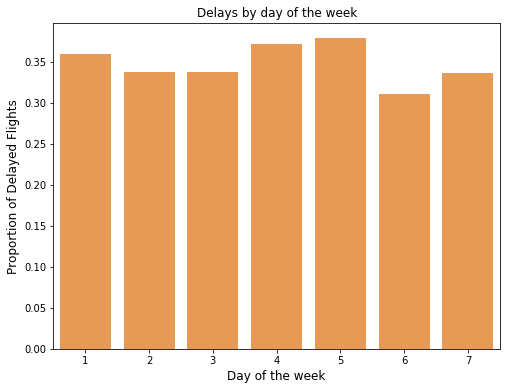

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(week_delay.index, week_delay.values, alpha=0.8, color=color[1])
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Proportion of Delayed Flights', fontsize=12)
plt.title('Delays by day of the week')
plt.show()

**We can clearly see that Friday has the highest delay rate followed by Thursday. On the other hand, Saturday has the least delay rate.**

###  Cancellations by day of the week

In [39]:
week_canc = df['CANCELLED'].groupby(by=df['DAY_OF_WEEK']).mean()
week_canc

DAY_OF_WEEK
1    0.014704
2    0.018493
3    0.019869
4    0.017962
5    0.017941
6    0.010109
7    0.012799
Name: CANCELLED, dtype: float32

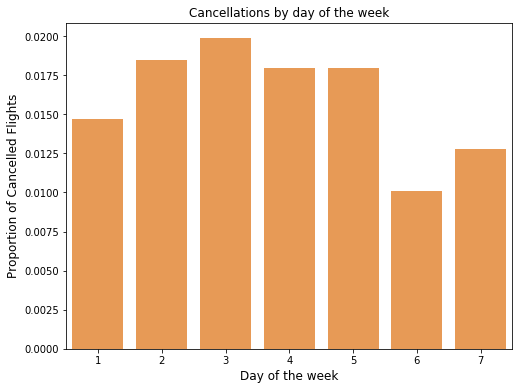

In [40]:
plt.figure(figsize=(8,6))
sns.barplot(week_canc.index, week_canc.values, alpha=0.8, color=color[1])
plt.xlabel('Day of the week', fontsize=12)
plt.ylabel('Proportion of Cancelled Flights', fontsize=12)
plt.title('Cancellations by day of the week')
plt.show()

**We can clearly see that Wednesday has the highest cancellation rate followed by Tuesday. Even in this case, Saturday has the least cancellation rate.**

###  Delays by month

In [41]:
month_delay = df['DELAYED'].groupby(by=df['MONTH']).mean()
month_delay

MONTH
1     0.314735
2     0.340471
3     0.328775
4     0.335305
5     0.352671
6     0.377572
7     0.383590
8     0.380177
9     0.308236
10    0.334616
11    0.367185
12    0.349938
Name: DELAYED, dtype: float64

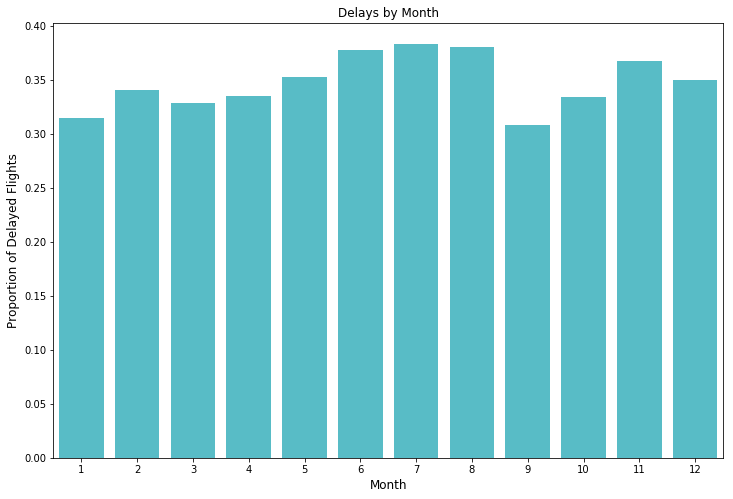

In [42]:
plt.figure(figsize=(12,8))
sns.barplot(month_delay.index, month_delay.values, alpha=0.8, color=color[9])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Proportion of Delayed Flights', fontsize=12)
plt.title('Delays by Month')
plt.show()

**We can clearly see that July has the highest delay rate followed by August & June. On the other hand, September has the least delay rate.**

### Cancellations by Month

In [43]:
month_canc = df['CANCELLED'].groupby(by=df['MONTH']).mean()
month_canc

MONTH
1     0.030115
2     0.017237
3     0.028236
4     0.010254
5     0.011605
6     0.017078
7     0.017175
8     0.019162
9     0.013883
10    0.007280
11    0.010669
12    0.011370
Name: CANCELLED, dtype: float32

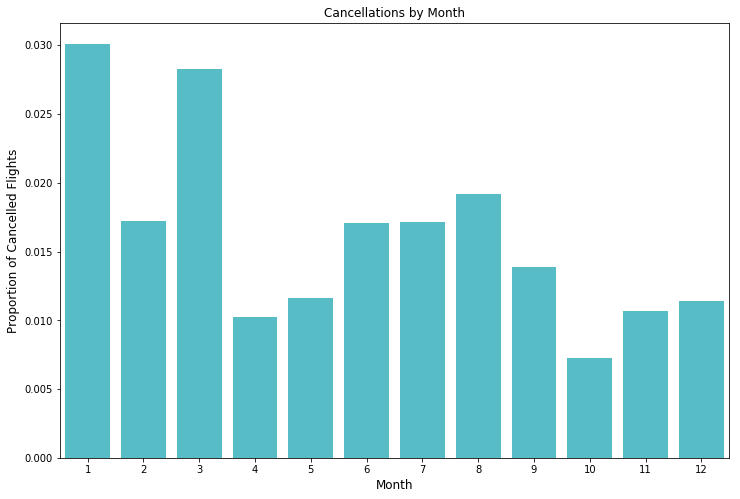

In [44]:
plt.figure(figsize=(12,8))
sns.barplot(month_canc.index, month_canc.values, alpha=0.8, color=color[9])
plt.xlabel('Month', fontsize=12)
plt.ylabel('Proportion of Cancelled Flights', fontsize=12)
plt.title('Cancellations by Month')
plt.show()

**January has the highest cancellation rate followed by March. While October has the least cancellation rate.**

### Delays/Cancellations by Seasons

In [45]:
season_delay = df['DELAYED'].groupby(by=df['Season']).mean()
season_canc = df['CANCELLED'].groupby(by=df['Season']).mean()
season_analysis = pd.concat([season_delay, season_canc], axis=1)
season_analysis

,DELAYED,CANCELLED
Season,,
Fall,0.342405,0.008989
Spring,0.345991,0.014605
Summer,0.367723,0.017645
Winter,0.335457,0.023568


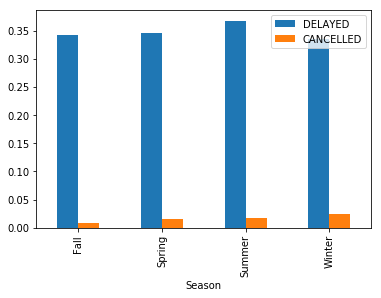

In [46]:
season_analysis.plot(kind='bar')

**Summer has the highest delay rate while Winter has the highest Cancellation rate.**

### Factors for Cancellation of flights

In [35]:
factors = df['CANCEL_STATUS'][df['CANCEL_STATUS']!='Not Cancelled'].value_counts()
factors

Weather                61989
Carrier                29534
National Air System    25073
Security                  49
Name: CANCEL_STATUS, dtype: int64

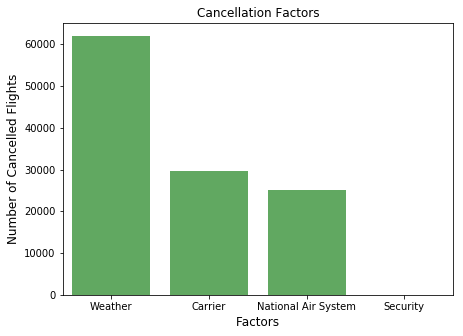

In [36]:
plt.figure(figsize=(7,5))
sns.barplot(factors.index, factors.values, alpha=0.8, color=color[2])
plt.xlabel('Factors', fontsize=12)
plt.ylabel('Number of Cancelled Flights', fontsize=12)
plt.title('Cancellation Factors')
plt.show()

#### As expected, Weather was the reason for the hightest number of cancellations.

#### As Weather seems to be the major reason for flight cancellations, we want to analyse the impact of Weather on cancellations across different regions of the United States. (since USA is a large country with diverse weather throughout)

### Function to map the airports by their Region in the US

In [49]:
NorthEast = ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont', 'New Jersey', 'New York', 'Pennsylvania', 'Delaware', 'Maryland']
SouthEast = ['West Virginia', 'Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Alabama', 'Louisiana', 'Arkansas', 'Mississippi', 'Tennessee', 'Kentucky']
MiddleWest =['North Dakota','Minnesota','South Dakota','Kansas','Indiana','Ohio','Michigan','Illinois','Iowa','Missouri','Wisconsin','Nebraska']
West =['Montana','Wyoming', 'Colorado','Utah','Idaho','Nevada','California','Oregon','Washington','Hawaii','Alaska']
SouthWest = ['Arizona','New Mexico','Texas','Oklahoma']
Other = ['U.S. Virgin Islands', 'U.S. Pacific Trust Territories and Possessions ']

In [51]:
df['Region'] = ''

In [52]:
def Region(state):
    if state in NorthEast :
        return('NorthEast')
    elif state in SouthEast :
        return('SouthEast')
    elif state in MiddleWest :
        return('MiddleWest')
    elif state in West :
        return('West')
    elif state in SouthWest :
        return('SouthWest')
    else:
        return('Other')

In [53]:
df['Region'] = df['ORIGIN_STATE_NM'].map(lambda x: Region(x))

In [54]:
df.Region.value_counts()

SouthEast     2012084
West          1799615
MiddleWest    1293662
NorthEast     1067121
SouthWest     1028445
Other           32050
Name: Region, dtype: int64

### Analysis of Flight Cancellations by Region & Weather

In [56]:
df['Region'][df['CANCEL_STATUS'] == 'Weather'].value_counts()

SouthEast     19152
NorthEast     16606
MiddleWest    12856
SouthWest      7283
West           5979
Other           113
Name: Region, dtype: int64

In [57]:
df_cancel = df[(df['CANCEL_STATUS']!='Not Cancelled') & (df['Region'] != 'Other')]

In [58]:
table = df_cancel.groupby(['Region','CANCEL_STATUS'])['OP_CARRIER_AIRLINE_ID'].count().unstack()
table = table.fillna(0)
table

CANCEL_STATUS,Carrier,National Air System,Security,Weather
Region,,,,
MiddleWest,3965,5885,12,12856
NorthEast,5184,9387,1,16606
SouthEast,9138,5664,9,19152
SouthWest,4798,1768,21,7283
West,6313,2349,6,5979


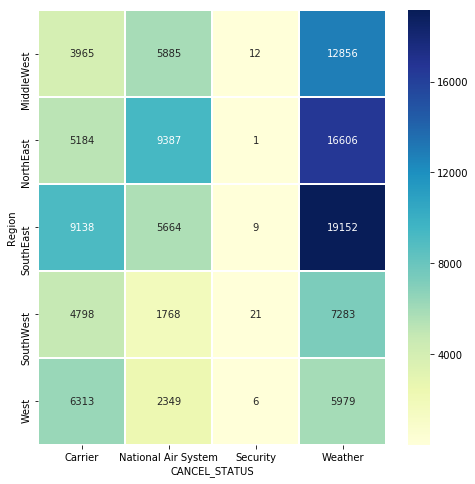

In [59]:
plt.figure(figsize=(8,8))
sns.heatmap(table, cmap='YlGnBu', annot=True, fmt='0.0f', square=True, linewidths=1);

- **We can see from the Heat Map that Weather seems to be the major factor for cancellations across all the regions except for West**

- **The number of cancellations due to Weather are the highest in SouthEast followed by NorthEast**

### Factors for Delays of flights

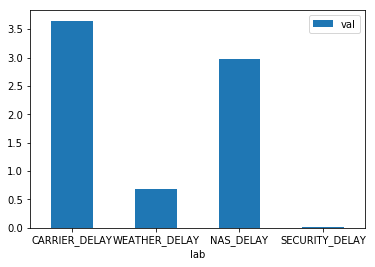

In [61]:
df2 = pd.DataFrame({'lab':['CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY'], 
                    'val':[df['CARRIER_DELAY'].mean(), df['WEATHER_DELAY'].mean(), df['NAS_DELAY'].mean(), df['SECURITY_DELAY'].mean()]})
ax = df2.plot.bar(x='lab', y='val', rot=0)

#### Unlike the case of Cancellations, Weather doesn't seem to be an important factor for Delays. Carriers and NAS are the most prominent factors affecting the delay time.

### Analysis of Flight Delays by Region & Weather

In [62]:
df_delay = df[((df['CARRIER_DELAY'] > 0) | (df['WEATHER_DELAY'] > 0) | (df['NAS_DELAY'] > 0) | (df['SECURITY_DELAY'] > 0)) & (df['Region'] != 'Other')]
df_delay.head(2)

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER,ORIGIN_AIRPORT_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_NM,DEST_AIRPORT_ID,DEST,DEST_CITY_NAME,DEST_STATE_NM,DEP_TIME,DEP_DELAY,DEP_TIME_BLK,ARR_TIME,ARR_DELAY,ARR_TIME_BLK,CANCELLED,CANCELLATION_CODE,DIVERTED,AIR_TIME,FLIGHTS,DISTANCE,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,Airlines,CANCEL_STATUS,Date,HolidayStat,Season,DELAYED,Region
68,2018,1,27,6,19977,UA,11292,DEN,"Denver, CO",Colorado,12889,LAS,"Las Vegas, NV",Nevada,1217,42.0,1100-1159,1341,68.0,1200-1259,0.0,None,0.0,85,1,628.0,42.0,0.0,26.0,0.0,0.0,United Air Lines Inc.,Not Cancelled,01-27-2018,0.0,Winter,1,West
84,2018,1,27,6,19977,UA,10821,BWI,"Baltimore, MD",Maryland,12266,IAH,"Houston, TX",Texas,822,-6.0,0800-0859,1153,48.0,1100-1159,0.0,None,0.0,203,1,1235.0,0.0,0.0,48.0,0.0,0.0,United Air Lines Inc.,Not Cancelled,01-27-2018,0.0,Winter,1,NorthEast


In [63]:
table2 = df_delay.groupby(['Region'])['CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY'].mean()
table2

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY
Region,,,,
MiddleWest,22.863192,5.183434,20.230898,0.064207
NorthEast,21.898626,3.749459,20.482695,0.094142
SouthEast,21.901344,5.335678,18.918344,0.105194
SouthWest,23.448698,4.520161,14.173765,0.171243
West,22.087309,1.987523,16.851368,0.110998


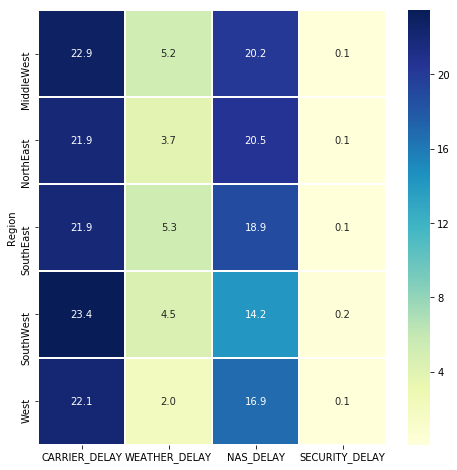

In [64]:
plt.figure(figsize=(8,8))
sns.heatmap(table2, cmap='YlGnBu', annot=True, fmt='0.1f', square=True, linewidths=1);

- **Among the delayed flights, average carrier delay is the highest compared to other delays across all the regions**

- **And interestingly this average carrier delay time is almost the same across all the regions**

### Analysis by Airlines

In [67]:
df['Airlines'].value_counts()

Southwest Airlines Co.      1356359
Delta Air Lines Inc.         951946
American Airlines Inc.       919225
SkyWest Airlines Inc.        776186
United Air Lines Inc.        623118
Republic Airline             316929
JetBlue Airways              305863
Envoy Air                    296739
PSA Airlines Inc.            279188
Endeavor Air Inc.            246611
Alaska Airlines Inc.         246488
Mesa Airlines Inc.           215664
ExpressJet Airlines Inc.     203469
Spirit Air Lines             176667
Frontier Airlines Inc.       120333
Allegiant Air                 96563
Hawaiian Airlines Inc.        83959
Virgin America                17670
Name: Airlines, dtype: int64

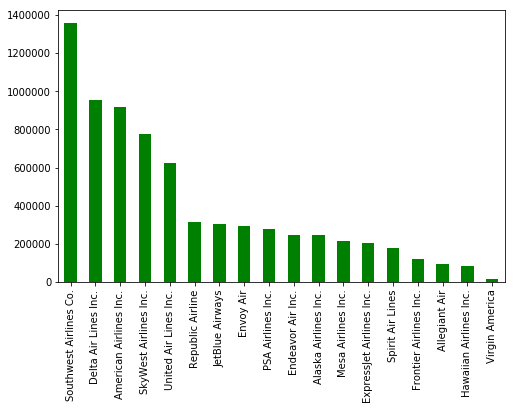

In [86]:
df['Airlines'].value_counts().plot(kind='bar', color='green', figsize=(8,5));

#### SouthWest, Delta and American Airlines are the major players in the United States Domestic Airline Industry

### Analysis of Flight Cancellations by Airlines

In [69]:
table3 = df_cancel.groupby(['Airlines','CANCEL_STATUS'])['OP_CARRIER_AIRLINE_ID'].count().unstack()
table3 = table3.fillna(0)
table3

CANCEL_STATUS,Carrier,National Air System,Security,Weather
Airlines,,,,
Alaska Airlines Inc.,1055.0,591.0,0.0,565.0
Allegiant Air,399.0,33.0,10.0,331.0
American Airlines Inc.,4487.0,726.0,26.0,9684.0
Delta Air Lines Inc.,431.0,192.0,0.0,2898.0
Endeavor Air Inc.,341.0,3813.0,0.0,2201.0
Envoy Air,1748.0,6382.0,0.0,2534.0
ExpressJet Airlines Inc.,1544.0,2574.0,0.0,1553.0
Frontier Airlines Inc.,1568.0,0.0,0.0,728.0
Hawaiian Airlines Inc.,237.0,0.0,0.0,13.0


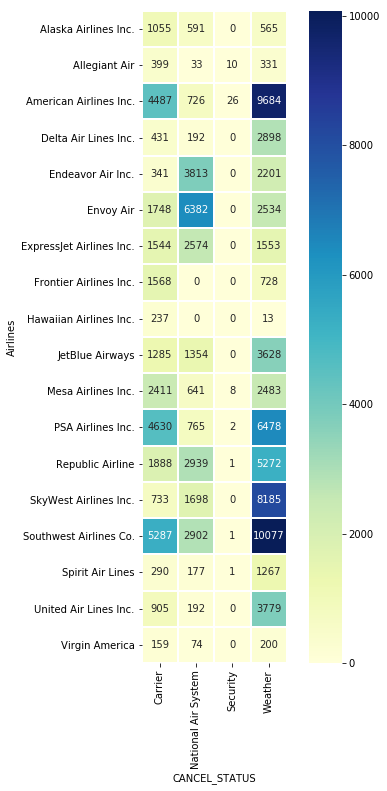

In [70]:
plt.figure(figsize=(8,12))
sns.heatmap(table3, cmap='YlGnBu', annot=True, fmt='0.0f', square=True, linewidths=1);

#### From our analysis before we already know that Weather is the major factor in Cancellations. Weather is something that one cannot control but the second prominent factor Carrier can be controlled by the Airlines

### Analysis of Flight Cancellations by Carrier

In [72]:
table4 = df.groupby(['Airlines','CANCEL_STATUS'])['OP_CARRIER_AIRLINE_ID'].count().unstack()
table4 = table4.fillna(0)
table4['Carrier'] = table4['Carrier']/(table4['Carrier'] + table4['National Air System'] + table4['Not Cancelled'] + 
                                       table4['Security'] + table4['Weather'])
table4 = table4[['Carrier']]
table4

CANCEL_STATUS,Carrier
Airlines,
Alaska Airlines Inc.,0.004280
Allegiant Air,0.004142
American Airlines Inc.,0.004899
Delta Air Lines Inc.,0.000456
Endeavor Air Inc.,0.001383
Envoy Air,0.005891
ExpressJet Airlines Inc.,0.007588
Frontier Airlines Inc.,0.013230
Hawaiian Airlines Inc.,0.002823


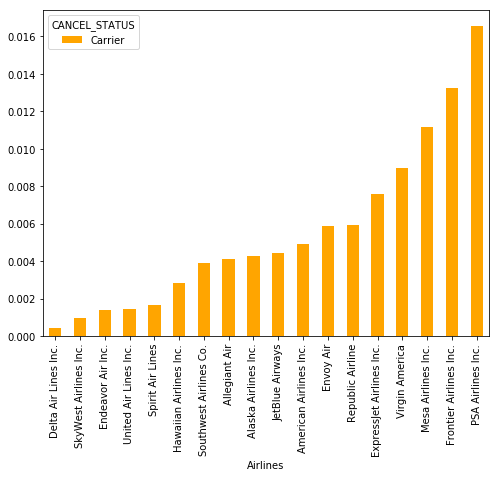

In [73]:
table4.sort_values(by='Carrier').plot(kind='bar', figsize=(8,6), color='orange');

#### Delta Airlines has the least rate of cancellations due to carrier among all the Airlines although it's one of the biggest airline of the country

### Analysis of Flight Delays by Airlines

In [94]:
table5 = df.groupby(['Airlines'])['CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY'].mean()
table5

,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY
Airlines,,,,
Alaska Airlines Inc.,2.195170,0.195421,3.193729,0.029957
Allegiant Air,6.048445,0.920881,2.324938,0.036857
American Airlines Inc.,4.074394,0.706286,2.910369,0.024522
Delta Air Lines Inc.,3.066886,0.767649,2.451972,0.006290
Endeavor Air Inc.,3.596081,1.012866,3.840202,0.004310
Envoy Air,2.670970,1.022700,3.242648,0.009257
ExpressJet Airlines Inc.,5.646128,0.647538,5.073284,0.000000
Frontier Airlines Inc.,5.764554,0.205463,3.943108,0.000000
Hawaiian Airlines Inc.,2.987970,0.189223,0.103336,0.016222


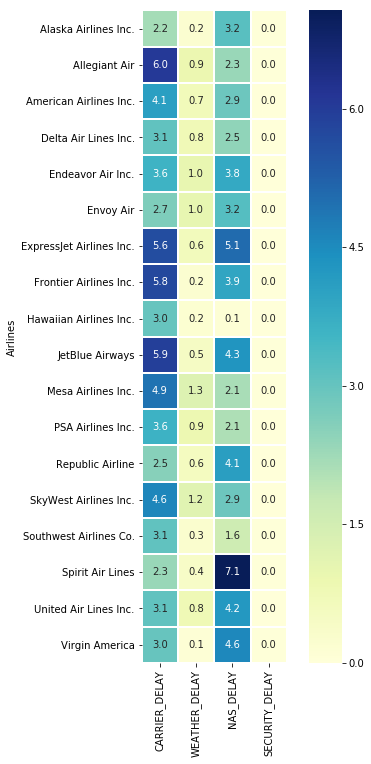

In [95]:
plt.figure(figsize=(8,12))
sns.heatmap(table5, cmap='YlGnBu', annot=True, fmt='0.1f', square=True, linewidths=1);

#### From our analysis before we already know that Carrier is the major factor in Delays. We can see the average carrier delay time is in the range of 2-6 min/flight for all the Airlines 

### Analysis of Flight Delays by Carrier

In [97]:
table5 = table5[['CARRIER_DELAY']]
table5

,CARRIER_DELAY
Airlines,
Alaska Airlines Inc.,2.195170
Allegiant Air,6.048445
American Airlines Inc.,4.074394
Delta Air Lines Inc.,3.066886
Endeavor Air Inc.,3.596081
Envoy Air,2.670970
ExpressJet Airlines Inc.,5.646128
Frontier Airlines Inc.,5.764554
Hawaiian Airlines Inc.,2.987970


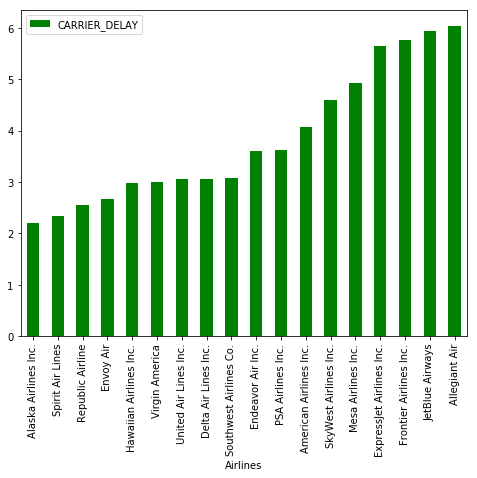

In [99]:
table5.sort_values(by='CARRIER_DELAY').plot(kind='bar', figsize=(8,6), color='green');

#### Alaska Airlines has the least average carrier delay time per flight where as Allegiant Air has the highest carrier delay. Also, we can note that Delta that performed the best for carrier cancellations is not among the top performers for carrier delays

### Analysis of Top 10 Busiest Airports

In [32]:
df['ORIGIN'].value_counts().shape

(358,)

There are 358 Airports in total in the US

In [33]:
df['ORIGIN'].value_counts().head(10)

ATL    391140
ORD    333763
DFW    280032
DEN    236612
CLT    233927
LAX    222089
SFO    176318
PHX    174462
IAH    174267
LGA    171540
Name: ORIGIN, dtype: int64

**These are the top 10 busiest Airports. Atlanta is the busiest of all.**

### Cancellations & Delays at Atlanta Airport

In [1]:
df_atl = df[df['ORIGIN'] == 'ATL']

In [37]:
factors_atl = df_atl['CANCEL_STATUS'][df['CANCEL_STATUS']!='Not Cancelled'].value_counts()
factors_atl

Weather                1637
Carrier                 525
National Air System     382
Name: CANCEL_STATUS, dtype: int64

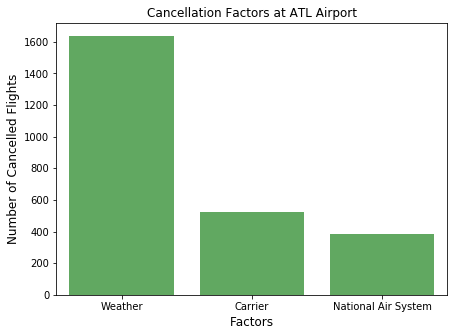

In [39]:
plt.figure(figsize=(7,5))
sns.barplot(factors_atl.index, factors_atl.values, alpha=0.8, color=color[2])
plt.xlabel('Factors', fontsize=12)
plt.ylabel('Number of Cancelled Flights', fontsize=12)
plt.title('Cancellation Factors at ATL Airport')
plt.show()

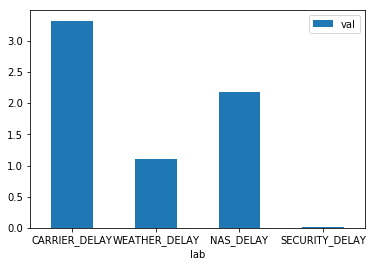

In [41]:
df3 = pd.DataFrame({'lab':['CARRIER_DELAY','WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY'], 
                    'val':[df_atl['CARRIER_DELAY'].mean(), df_atl['WEATHER_DELAY'].mean(), df_atl['NAS_DELAY'].mean(), df_atl['SECURITY_DELAY'].mean()]})
ax = df3.plot.bar(x='lab', y='val', rot=0)

**Weather is the major factor for cancellations and Carrier the major factor for Delays at Atlanta Airport. This aligns pretty well to our previous analysis.**

### Comparsion of Delay factors across the top 10 busiest Airports

In [ ]:
df4 = pd.DataFrame({'lab':['ATL','ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'SFO', 'PHX', 'IAH', 'LGA'], 
                    'val':[df['SECURITY_DELAY'][df['ORIGIN'] == 'ATL'].mean(), df['SECURITY_DELAY'][df['ORIGIN'] == 'ORD'].mean(), df['SECURITY_DELAY'][df['ORIGIN'] == 'DFW'].mean(), df['SECURITY_DELAY'][df['ORIGIN'] == 'DEN'].mean(),
                          df['SECURITY_DELAY'][df['ORIGIN'] == 'CLT'].mean(), df['SECURITY_DELAY'][df['ORIGIN'] == 'LAX'].mean(), df['SECURITY_DELAY'][df['ORIGIN'] == 'SFO'].mean(), df['SECURITY_DELAY'][df['ORIGIN'] == 'PHX'].mean(), 
                          df['SECURITY_DELAY'][df['ORIGIN'] == 'IAH'].mean(), df['SECURITY_DELAY'][df['ORIGIN'] == 'LGA'].mean()]
                    
df5 = pd.DataFrame({'lab':['ATL','ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'SFO', 'PHX', 'IAH', 'LGA'], 
                    'val':[df['CARRIER_DELAY'][df['ORIGIN'] == 'ATL'].mean(), df['CARRIER_DELAY'][df['ORIGIN'] == 'ORD'].mean(), df['CARRIER_DELAY'][df['ORIGIN'] == 'DFW'].mean(), df['CARRIER_DELAY'][df['ORIGIN'] == 'DEN'].mean(),
                          df['CARRIER_DELAY'][df['ORIGIN'] == 'CLT'].mean(), df['CARRIER_DELAY'][df['ORIGIN'] == 'LAX'].mean(), df['CARRIER_DELAY'][df['ORIGIN'] == 'SFO'].mean(), df['CARRIER_DELAY'][df['ORIGIN'] == 'PHX'].mean(), 
                          df['CARRIER_DELAY'][df['ORIGIN'] == 'IAH'].mean(), df['CARRIER_DELAY'][df['ORIGIN'] == 'LGA'].mean()]})
                    
df6 = pd.DataFrame({'lab':['ATL','ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'SFO', 'PHX', 'IAH', 'LGA'], 
                    'val':[df['WEATHER_DELAY'][df['ORIGIN'] == 'ATL'].mean(), df['WEATHER_DELAY'][df['ORIGIN'] == 'ORD'].mean(), df['WEATHER_DELAY'][df['ORIGIN'] == 'DFW'].mean(), df['WEATHER_DELAY'][df['ORIGIN'] == 'DEN'].mean(),
                          df['WEATHER_DELAY'][df['ORIGIN'] == 'CLT'].mean(), df['WEATHER_DELAY'][df['ORIGIN'] == 'LAX'].mean(), df['WEATHER_DELAY'][df['ORIGIN'] == 'SFO'].mean(), df['WEATHER_DELAY'][df['ORIGIN'] == 'PHX'].mean(), 
                          df['WEATHER_DELAY'][df['ORIGIN'] == 'IAH'].mean(), df['WEATHER_DELAY'][df['ORIGIN'] == 'LGA'].mean()]})

df7 = pd.DataFrame({'lab':['ATL','ORD', 'DFW', 'DEN', 'CLT', 'LAX', 'SFO', 'PHX', 'IAH', 'LGA'], 
                    'val':[df['NAS_DELAY'][df['ORIGIN'] == 'ATL'].mean(), df['NAS_DELAY'][df['ORIGIN'] == 'ORD'].mean(), df['NAS_DELAY'][df['ORIGIN'] == 'DFW'].mean(), df['NAS_DELAY'][df['ORIGIN'] == 'DEN'].mean(),
                          df['NAS_DELAY'][df['ORIGIN'] == 'CLT'].mean(), df['NAS_DELAY'][df['ORIGIN'] == 'LAX'].mean(), df['NAS_DELAY'][df['ORIGIN'] == 'SFO'].mean(), df['NAS_DELAY'][df['ORIGIN'] == 'PHX'].mean(), 
                          df['NAS_DELAY'][df['ORIGIN'] == 'IAH'].mean(), df['NAS_DELAY'][df['ORIGIN'] == 'LGA'].mean()]})


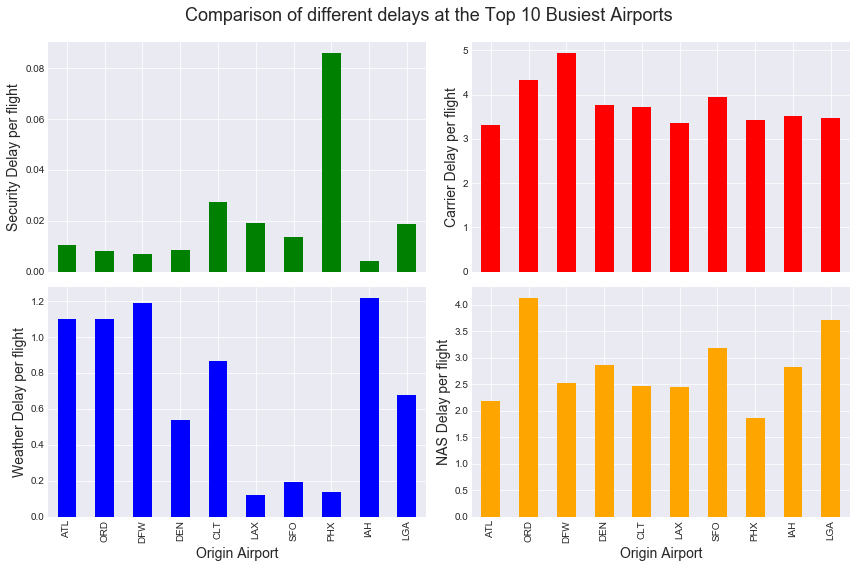

In [128]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(2, 2, figsize=(12,8), sharex=True)

df4.plot(x='lab', y='val', color='green', kind='bar', ax=ax[0,0], legend=False)
ax[0,0].set_ylabel('Security Delay per flight', fontsize=14)

df5.plot(x='lab', y='val', color='Red', kind='bar', ax=ax[0,1], legend=False)
ax[0,1].set_ylabel('Carrier Delay per flight', fontsize=14)

df6.plot(x='lab', y='val', color='blue', kind='bar', ax=ax[1,0], legend=False)
ax[1,0].set_xlabel('Origin Airport', fontsize=14)
ax[1,0].set_ylabel('Weather Delay per flight', fontsize=14)

df7.plot(x='lab', y='val', color='orange', kind='bar', ax=ax[1,1], legend=False)
ax[1,1].set_xlabel('Origin Airport', fontsize=14)
ax[1,1].set_ylabel('NAS Delay per flight', fontsize=14)

fig.suptitle('Comparison of different delays at the Top 10 Busiest Airports', fontsize=18) 
plt.tight_layout()
fig.subplots_adjust(top=0.92);

- **Security delay is the major factor that we can attribute to Airports. Except for Phoenix, we can see that all the busy Airports are having a very minimal security delay per flight.**
- **We generally expect Carrier Delay to be independant of Airports and we can see from above that the Carrier delay per flight is consistent among the busiest Airports. This also agrees with our prior analysis where we saw that average carrier delay is independant of the region in the US.**
- **Los Angeles, San Fransisco and Phoenix Airports have the least weather delay per flight among the busy airports. We can attribute this to our prior finding that Western Regions have less weather delay compared to other regions.**
- **NAS Delay per flight is also consistent among the busy Airports except for CRD and LGA Airports..**

## Summary

**We have downloaded and scrapped the airline data, lookup tables, holiday data and season information from their respective mentioned websites. Then, we have done our data concatination, merging and transformation operations to get our final data frame. We then handled the missing values to start our analysis.**

**We analyzed factors that lead to delays and cancellations of flights in the United States. The factors that have been analysed are Seasons, months, day of the week, holidays, origin airports, reasons for cancellations/delays, regions and Airlines.**

**The main findings from our analysis are :**

- **Weather is the main factor for flight cancellations in the United States.**
- **Weather is the major factor for cancellations across all the regions except for West. SouthEast followed by NorthEast have the highest flight cancellations due to weather and we expect this due to inclement weather in these regrions.**
- **Unlike the case of Cancellations, Weather doesn't seem to be an important factor for Delays. Carriers and NAS are the most prominent factors affecting the delay time.**
- **Among the delayed flights, average carrier delay is the highest compared to other delays across all the regions. And interestingly this average carrier delay time is almost the same across all the regions.**
- **Delta Airlines has the least rate of cancellations due to carrier among all the Airlines though it's one of the biggest airline of the country.**
- **Average carrier delay time is in the range of 2-6 min/flight for all the Airlines.**
- **Alaska Airlines has the least average carrier delay time per flight where as Allegiant Air has the highest carrier delay. Delta that performed the best for carrier cancellations is not among the top performers for carrier delays but it's carrier delay time is still considerably low.**
- **Except for Phoenix, all the busy Airports are ensuring a very minimal security delay per flight.**
- **The busy Airports in the Western side of the US have less weather delay compared to the busy Airports in the other regions.**